#Зачётная работа по генерации данных

In [ ]:
# Импортирование необходимых библиотек
import matplotlib.pyplot as plt   # Отрисовка изображений в Colab
from PIL import Image, ImageDraw  # Библиотека для работы с изображениями
import numpy as np

In [ ]:
# Подключаем Google-диск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def isPortraitFormat(width: int, height: int):
  if height > width:
    return True
  else:
    return False

def smart_crop(img, target_h, target_w):
  img_w, img_h = img.size                 # Сохраняем размер картинки

  # Проверка на формат и сжатие
  if isPortraitFormat(img_w, img_h):
    new_w = target_w                      # Подстраиваемся под ширину
    new_h = round(new_w / img_w * img_h)  # Рассчитываем приблизительную высоту

  else:
    new_h = target_h                      # Подстраиваемся под высоту
    new_w = round(new_h / img_h * img_w)  # Рассчитываем приблизительную ширину
  
  img = img.resize((new_w, new_h), Image.ANTIALIAS) # Применяем первые изменения

                                        # Обрезка лишнего

  # Находим координаты центра сжатой картинки
  center_w = new_w // 2
  center_h = new_h // 2

  # Находим левую верхнюю точку для прямоугольной обрезки
  top_left_w = center_w - target_w // 2
  top_left_h = center_h - target_h // 2

  # Находим правую нижняя точку для прямоугольной обрезки
  bottom_right_w = center_w + target_w // 2
  bottom_right_h = center_h + target_h // 2

  # Обрезаем изображение прямоугольной областью по заданным координатам
  img = img.crop((top_left_w, top_left_h, bottom_right_w, bottom_right_h))

  return img

Общие задания
---

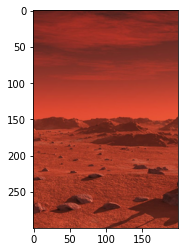

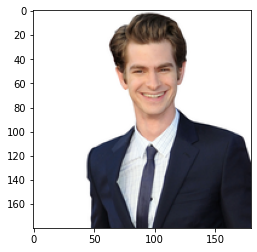

In [ ]:
pic = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/mars536x939.jpg'

img = Image.open(pic)   # Загружаем изображение

img = smart_crop(img, 300, 200)
plt.imshow(img)
plt.show()

pic2 = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/human.png'

img2 = Image.open(pic2)   # Загружаем изображение

img2 = smart_crop(img2, 180, 180)
plt.imshow(img2)
plt.show()

# Преобразуем картинку в массив, чтобы удостовериться, что у нас действительно четырехмерный массив RGBA

image_data = img2.getdata() # Получаем данные картинки
image_data = np.array(image_data) # Преобразуем в np массив
image_data = image_data.reshape(img2.size[1], img2.size[0], 4)

# print(image_data[5]) #Посмотрим часть значений пикселей и увидим Альфа канал

Индивидульные задания
---




Создать 20 синтетических фото, используя инструкции из индивидуального задания.

5. Используйте 5 фонов и уменьшение объекта на 5, 10, 15 и 20 процентов. **Располагать объект по центру.**

In [ ]:
# Задние фоны
backgrounds = []
background1 = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/images_for_augmentation/background1.jpg'
background2 = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/images_for_augmentation/background2.jpg'
background3 = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/images_for_augmentation/background3.jpg'
background4 = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/images_for_augmentation/background4.jpg'
background5 = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/images_for_augmentation/background5.jpg'
backgrounds.extend([background1, background2, background3, background4, background5])
# print(backgrounds)

# Логотип
logoFile = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/images_for_augmentation/logo1.png'

generated_files_location = '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Control_points/CP2_Data_Augmentation/generated_images'

In [ ]:
logo_img = Image.open(logoFile)
resizable_logo_img = logo_img.copy()


COUNT_OF_SIZES = 5 # Количество размеров, к которым нужно привести логотип и с которыми нужно сделать изображения
k = 1.00 # Коэф. изменения размера логотипа

sizeNum = 0
backgroundNum = 1
for background in backgrounds: # Цикл для смены фона
  while sizeNum < COUNT_OF_SIZES: # Цикл для изменения размера логотипа
    background_img = Image.open(background)

    # Преобразумем его к формату RGBA (с каналом прозрачности)
    background_img = background_img.convert('RGB')

    # Приведение логотипа к нужному размеру
    resizable_logo_img = smart_crop(resizable_logo_img, round(resizable_logo_img.size[1] * k), round(resizable_logo_img.size[0] * k))

          # Наложение логотипа в центр

    # Вычисление координат центра изображения
    background_img_width  = background_img.size[0]  # Получаем ширину
    background_img_height = background_img.size[1]  # Получаем высоту

    #центральные пиксели фона
    width_space = background_img_width // 2
    height_space = background_img_height // 2
    #теперь это координаты для наложения логотипа
    width_space = width_space - resizable_logo_img.size[0] // 2 # По ширине
    height_space = height_space - resizable_logo_img.size[1] // 2 # По высоте

    # Наложение логотипа на фон
    img_result = background_img.copy()
    img_result.paste(resizable_logo_img, (width_space, height_space), resizable_logo_img)

    # Перевод изображения в np массив
    img_result = np.asarray(img_result, dtype='uint8')
    # Вывод результата
    plt.figure(figsize=(8, 8))
    plt.imshow(img_result)
    plt.show()

    # Перевод массива в обратно изображение
    img_result = Image.fromarray(img_result)
    img_result = img_result.convert('RGB') # Конвертация изображения обратно в RGB

    # Сохранение изображения
    img_result.save(f'{generated_files_location}/background_num_{backgroundNum}_logo_size_{k}.jpeg')
    k = round(k - 0.05, 2) # Меняем коэф. размера логотипа # Т.к. изображение следует уменьшать на 5% здесь k -= 0.95
    sizeNum += 1 # Счёт кол. размеров, с которыми уже было сгенерировано изображение
  
  # Переход к новому фону и восстановление параметров перед генерацией с новым фоном
  backgroundNum += 1
  sizeNum = 0 # Обнуление кол. размеров
  k = 1.00 # Восстанавление коэф. размера логотипа
  resizable_logo_img = logo_img.copy() # Восстанавление размера илоготипа

Output hidden; open in https://colab.research.google.com to view.